In [1]:
# This file contains all the metrics that we compare in the paper

# The metrics include CCA, mean squared CCA correlation, mean CCA correlation, pair-wise cca distance, linear cka distance, 
# linear cka prime distance, procrustes distance, and stochastic procrustes distance

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------
def cca_decomp(A, B):
    """Computes CCA vectors, correlations, and transformed matrices
    requires a < n and b < n
    Args:
        A: np.array of size a x n where a is the number of neurons and n is the dataset size
        B: np.array of size b x n where b is the number of neurons and n is the dataset size
    Returns:
        u: left singular vectors for the inner SVD problem
        s: canonical correlation coefficients
        vh: right singular vectors for the inner SVD problem
        transformed_a: canonical vectors for matrix A, a x n array
        transformed_b: canonical vectors for matrix B, b x n array
    """
    assert A.shape[0] < A.shape[1]
    assert B.shape[0] < B.shape[1]

    evals_a, evecs_a = np.linalg.eigh(A @ A.T)
    evals_a = (evals_a + np.abs(evals_a)) / 2
    inv_a = np.array([1 / np.sqrt(x) if x > 0 else 0 for x in evals_a])

    evals_b, evecs_b = np.linalg.eigh(B @ B.T)
    evals_b = (evals_b + np.abs(evals_b)) / 2
    inv_b = np.array([1 / np.sqrt(x) if x > 0 else 0 for x in evals_b])

    cov_ab = A @ B.T

    temp = (
        (evecs_a @ np.diag(inv_a) @ evecs_a.T)
        @ cov_ab
        @ (evecs_b @ np.diag(inv_b) @ evecs_b.T)
    )

    try:
        u, s, vh = np.linalg.svd(temp)
    except:
        u, s, vh = np.linalg.svd(temp * 100)
        s = s / 100

    transformed_a = (u.T @ (evecs_a @ np.diag(inv_a) @ evecs_a.T) @ A).T
    transformed_b = (vh @ (evecs_b @ np.diag(inv_b) @ evecs_b.T) @ B).T
    return u, s, vh, transformed_a, transformed_b
    
    
# ------------------------------------------
def mean_sq_cca_corr(rho):
    """
    compute mean squared cca correlation
    ARG: 
    rho: canonical correlation coefficients returned by cca_decomp(A, B)
    
    """
    return np.sum(rho * rho) / len(rho)

# ------------------------------------------
def mean_cca_corr(rho):
    """
    compute mean cca correlation
    ARG:
    rho: canonical correlation coefficients returned by cca_decomp(A, B)
    """
    return np.sum(rho) / len(rho)
    
    
# ------------------------------------------
def lin_cka_dist(A, B):
    """
    computes linear CKA distance between two representations A and B
    """
    similarity = np.linalg.norm(B @ A.T, ord = "fro") ** 2
    normalization = np.linalg.norm(A @ A.T, ord = "fro") * np.linalg.norm(B @ B.T, ord = "fro")
    return 1 - similarity / normalization


# ------------------------------------------
def pwcca_dist(A, rho, transformed_a):
    """Computes projection weighted CCA distance between A and B given the correlation
    coefficients rho and the transformed matrices after running CCA
    :param A: np.array of size a x n where a is the number of neurons and n is the dataset size
    :param B: np.array of size b x n where b is the number of neurons and n is the dataset size
    :param rho: canonical correlation coefficients returned by cca_decomp(A,B)
    :param transformed_a: canonical vectors for A returned by cca_decomp(A,B)
    :param transformed_b: canonical vectors for B returned by cca_decomp(A,B)
    :return: PWCCA distance
    """
    in_prod = transformed_a.T @ A.T
    weights = np.sum(np.abs(in_prod), axis=1)
    weights = weights / np.sum(weights)
    dim = min(len(weights), len(rho))
    return 1 - np.dot(weights[:dim], rho[:dim])


# ---------------------------------------------
def lin_cka_prime_dist(A, B):
    """
    Computes Linear CKA prime distance bewteen representations A and B
    The version here is suited to a, b >> n
    """
    if A.shape[0] > A.shape[1]:
        At_A = A.T @ A  # O(n * n * a)
        Bt_B = B.T @ B  # O(n * n * a)
        numerator = np.sum((At_A - Bt_B) ** 2)
        denominator = np.sum(A ** 2) ** 2 + np.sum(B ** 2) ** 2
        return numerator / denominator
    else:
        similarity = np.linalg.norm(B @ A.T, ord="fro") ** 2
        denominator = np.sum(A ** 2) ** 2 + np.sum(B ** 2) ** 2
        return 1 - 2 * similarity / denominator
    
    

# --------------------------------------------??????????
# I may use the code from Alex for Procrustes and stochastc metric comparison.
def procrustes(A, B):
    """
    computes Procrustes distance between representations A and B
    """
   # A_sq_frob = np.


# ---------------------------------------------------------
# functions useful for comparing representations
def mk_gaussian(s, c1, c2):
    """
    Make Gaussian tuning curves.
    ARG:
    s: one dimensional stimulus
    c1: first gaussian parameter that governs the center
    c2: second gaussian parameter that governs the width
    RETURNS:
    rsp: has the same dimensionality as the stimulus
    """
    rsp = np.exp(-(s - c1)**2/(2 * c2 ** 2))
    return rsp
    
    

In [2]:
# make stimulus

nterms = 200;
s = np.linspace(-1.2, 1.2, nterms)


(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7fe9703a8580>])

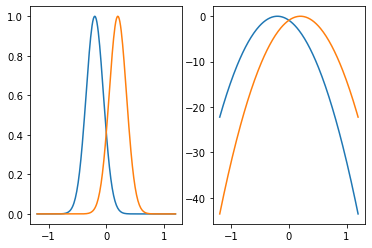

In [3]:
# construct two representations

# the first representation
r1_c1, r1_c2 = -0.2, 0.15
r1_mu1 = mk_gaussian(s, r1_c1, r1_c2)

r1_c3, r1_c4 = 0.2, 0.15
r1_mu2 = mk_gaussian(s, r1_c3, r1_c4)

plt.subplots(1, 2)
plt.subplot(121), plt.plot(s, r1_mu1, s, r1_mu2)

# the second representation
r2_mu1 = np.log(r1_mu1)
r2_mu2 = np.log(r1_mu2)

plt.subplot(122), plt.plot(s, r2_mu1, s, r2_mu2)


In [4]:
# create samples

n_samples = 56 # 56

id = np.round(np.linspace(0, nterms - 1, n_samples)).astype(int)

r1_mu_sample, r2_mu_sample = np.zeros([n_samples, 2]), np.zeros([n_samples, 2])
r1_cov_sample, r2_cov_sample = np.zeros([n_samples, 2, 2]), np.zeros([n_samples, 2, 2])

std_scale = 0.25 # scale on the standard deviation

for k in range(n_samples):
    # extract mean responses from the two representations
    r1_mu_sample[k, :] = [r1_mu1[id[k]], r1_mu2[id[k]]]
    r2_mu_sample[k, :] = [r2_mu1[id[k]], r2_mu2[id[k]]]
    
    # extract covariance responses from the two representations
    r1_cov_sample[k, :, :] = [[(std_scale * r1_mu1[id[k]]) ** 2, 0], [0, (std_scale * r1_mu2[id[k]]) ** 2]]
    r2_cov_sample[k, :, :] = [[(1/std_scale) ** 2, 0],  [0, (1/std_scale) ** 2]]
    

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x7fe968c99c10>])

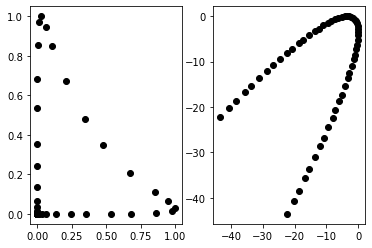

In [5]:
# visualize the sampled mean responses

plt.subplots(1, 2)
plt.subplot(121), plt.plot(r1_mu_sample[:, 0], r1_mu_sample[:, 1], 'ko')
plt.subplot(122), plt.plot(r2_mu_sample[:, 0], r2_mu_sample[:, 1], 'ko')

In [6]:
# compare representations

# cca:
u, rho, vh, transformed_a, transformed_b = cca_decomp(r1_mu_sample.T, r2_mu_sample.T)

msq_cca_score = mean_sq_cca_corr(rho)
m_cca_score   = mean_cca_corr(rho)
lin_cka_score = lin_cka_dist(r2_mu_sample.T, r1_mu_sample.T)
pwcca_dist1 = pwcca_dist(r1_mu_sample.T, rho, transformed_a)
pwcca_dist2 = pwcca_dist(r2_mu_sample.T, rho, transformed_b)
lcka_prime_score = lin_cka_prime_dist(r1_mu_sample.T, r2_mu_sample.T)


In [7]:
print(1 - msq_cca_score)
print(1 - m_cca_score)
print(lin_cka_score)
print(pwcca_dist1)
print(pwcca_dist1)
print(lcka_prime_score)

0.9748472056498062
0.8523324941830484
0.9895599576988513
0.8572008363027468
0.8572008363027468
0.9999949028004121


In [8]:
# compare the representation to itself
u, rho, vh, transformed_a, transformed_b = cca_decomp(r1_mu_sample.T, r1_mu_sample.T)

msq_cca_score = mean_sq_cca_corr(rho)
m_cca_score   = mean_cca_corr(rho)
lin_cka_score = lin_cka_dist(r1_mu_sample.T, r1_mu_sample.T)
pwcca_dist1 = pwcca_dist(r1_mu_sample.T, rho, transformed_a)
pwcca_dist2 = pwcca_dist(r2_mu_sample.T, rho, transformed_b)

print(1 - msq_cca_score)
print(1 - m_cca_score)
print(lin_cka_score)
print(pwcca_dist1)
print(pwcca_dist1)
print(lcka_prime_score)



8.881784197001252e-16
4.440892098500626e-16
0.0
4.440892098500626e-16
4.440892098500626e-16
0.9999949028004121


In [9]:
pwcca_dist2

4.440892098500626e-16